In [4]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [38]:
df = pd.read_csv("C:/Users/Prakash/Desktop/oasis infotech/Unemployment_Rate_upto_11_2020.csv")
print("jai shree ram")

jai shree ram


In [39]:
df

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,State,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Region                                267 non-null    object 
 1    Date                                 267 non-null    object 
 2    Frequency                            267 non-null    object 
 3    Estimated Unemployment Rate          267 non-null    float64
 4    Estimated Employed                   267 non-null    int64  
 5    Estimated Labour Participation Rate  267 non-null    float64
 6   State                                 267 non-null    object 
 7   longitude                             267 non-null    float64
 8   latitude                              267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [41]:
df.shape

(267, 9)

In [42]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [43]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate',
       ' Estimated Employed', ' Estimated Labour Participation Rate', 'State',
       'longitude', 'latitude'],
      dtype='object')

In [44]:
print(df.isnull().sum())

Region                                  0
 Date                                   0
 Frequency                              0
 Estimated Unemployment Rate            0
 Estimated Employed                     0
 Estimated Labour Participation Rate    0
State                                   0
longitude                               0
latitude                                0
dtype: int64


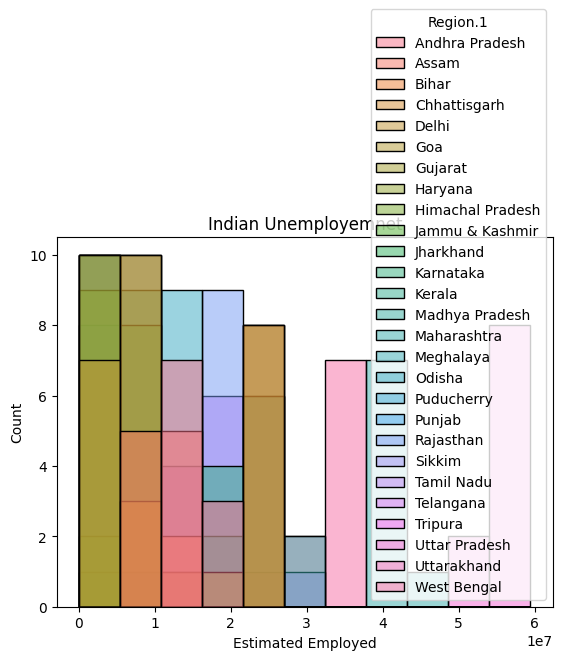

In [45]:
df.columns=["Region.1","Date","Frequency","Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)","Area","longitude","latitude"]
plt.title("Indian Unemployemnet")
sns.histplot(x="Estimated Employed",hue="Region.1", data=df)
plt.show()

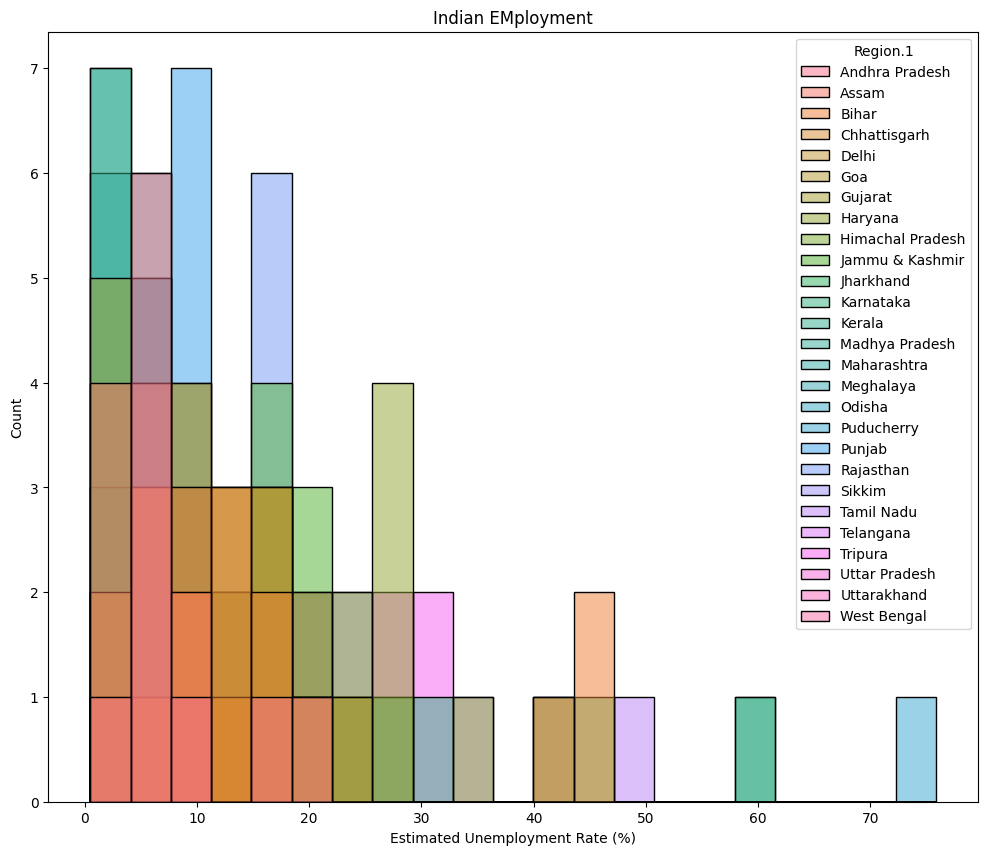

In [46]:
plt.figure(figsize=(12,10))
plt.title("Indian EMployment")
sns.histplot(x="Estimated Unemployment Rate (%)",hue="Region.1",data=df)
plt.show()

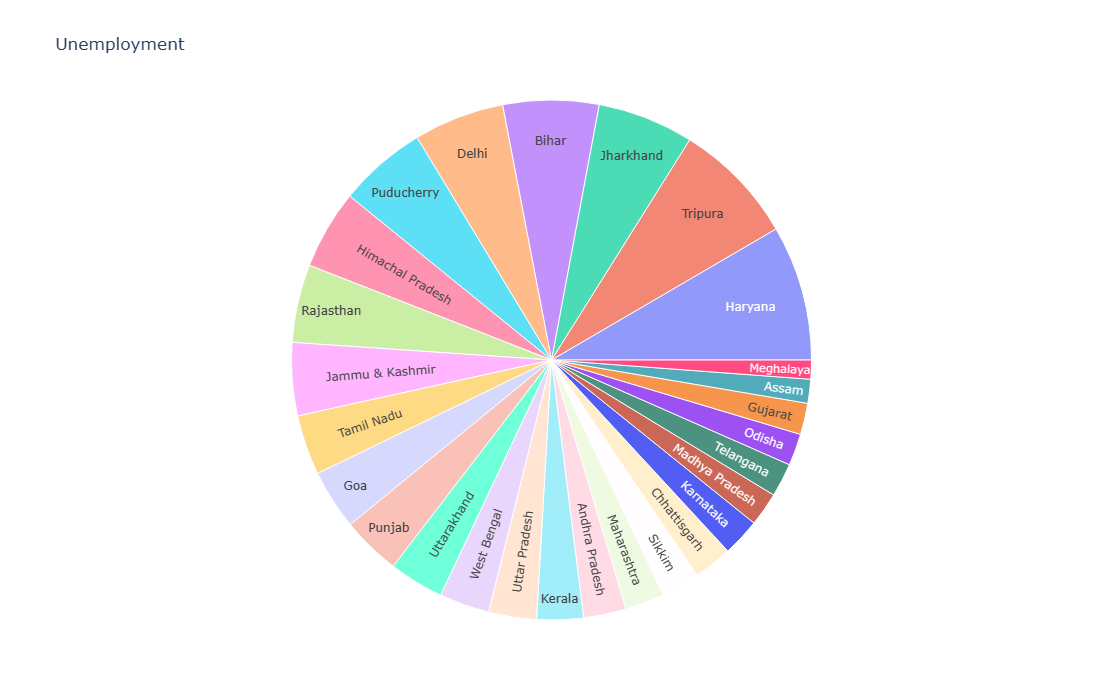

In [49]:


unemploment = df[["Region.1","Estimated Unemployment Rate (%)"]]
figure = px.sunburst(unemploment,path=["Region.1"],
                     values="Estimated Unemployment Rate (%)",
                     width=700, height=700,color_continuous_scale="RdY1Gn",
                     title="Unemployment")
figure.show()



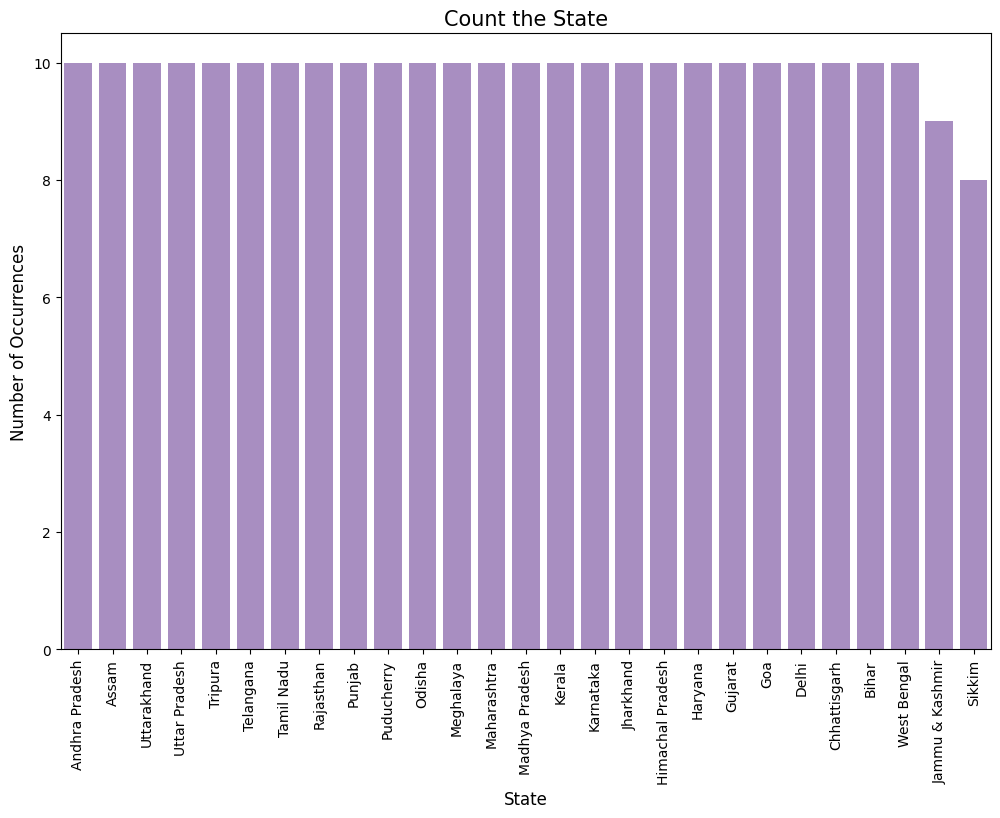

In [52]:
color = sns.color_palette()
cnt_srs = df["Region.1"].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[4])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Count the State', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


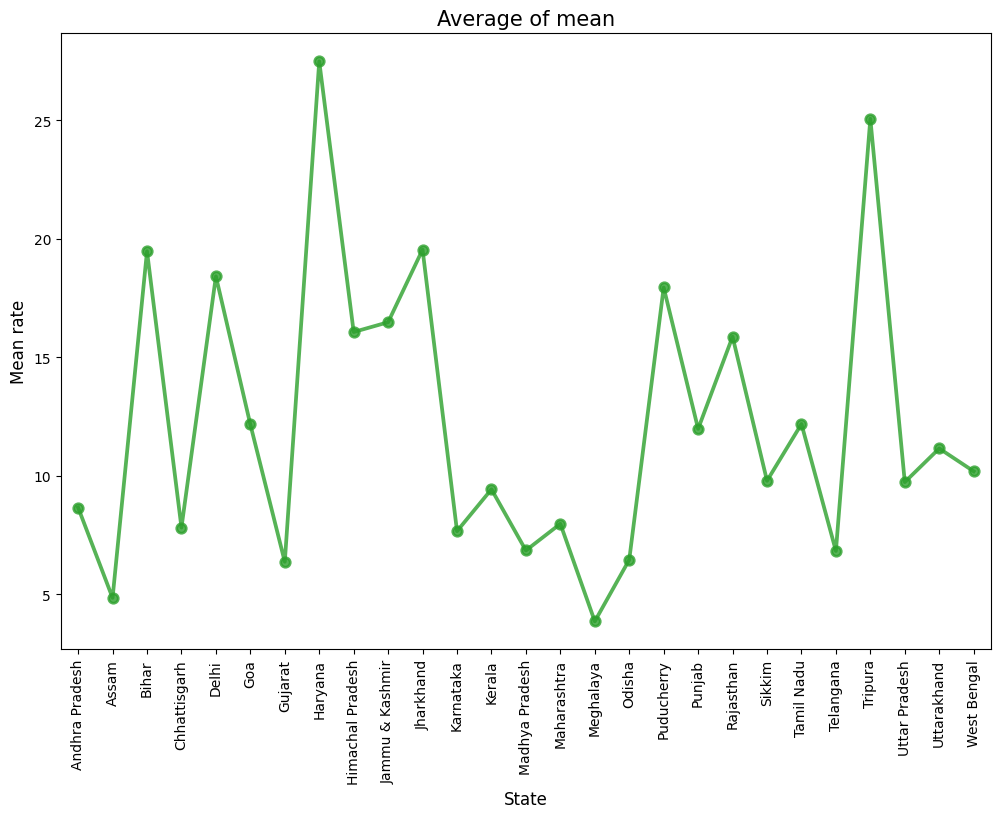

In [60]:
#grouped_df=df.groupby(["Region.1"])["Estimated Unemployment Rate (%)"].aggregate("mean").rest_index()
grouped_df = df.groupby(["Region.1"])["Estimated Unemployment Rate (%)"].aggregate("mean").reset_index()


plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['Region.1'].values, y=grouped_df['Estimated Unemployment Rate (%)'].values, alpha=0.8, color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Average of mean', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df["Region.1"].nunique()

27

In [66]:
make_total = df.pivot_table(values='Estimated Unemployment Rate (%)', index=['Region.1'], aggfunc='mean')
topstate = make_total.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)[:47]
print(topstate)


                  Estimated Unemployment Rate (%)
Region.1                                         
Haryana                                 27.477000
Tripura                                 25.055000
Jharkhand                               19.539000
Bihar                                   19.471000
Delhi                                   18.414000
Puducherry                              17.942000
Jammu & Kashmir                         16.477778
Himachal Pradesh                        16.065000
Rajasthan                               15.868000
Tamil Nadu                              12.187000
Goa                                     12.167000
Punjab                                  11.981000
Uttarakhand                             11.156000
West Bengal                             10.192000
Sikkim                                   9.792500
Uttar Pradesh                            9.737000
Kerala                                   9.434000
Andhra Pradesh                           8.664000
